<a href="https://colab.research.google.com/github/danielstvg/Scientific_analitycal_computing/blob/main/Taller%2012%20-%20%C3%81lgebra%20Lineal%2C%20Estad%C3%ADstica%20y%20Probabilidades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Taller Semana 12 - Álgebra Lineal, Estadística y Probabilidades
* Daniel Steven Vargas Guzmán [dsvargas@unbosque.edu.co](mailto://dsvargas@unbosque.edu.co)
14 de Mayo del 2021

#### 1. Suba el archivo mamiferos.csv a su Google Drive, y asegúrese de poderlo acceder desde su cuaderno de Colab.
#### Realice una captura de pantalla del panel de archivos, donde se vea el archivo montado en la ruta /content/drive/MyDrive/, y adjúntela a su entrega como sustento para este punto del taller.

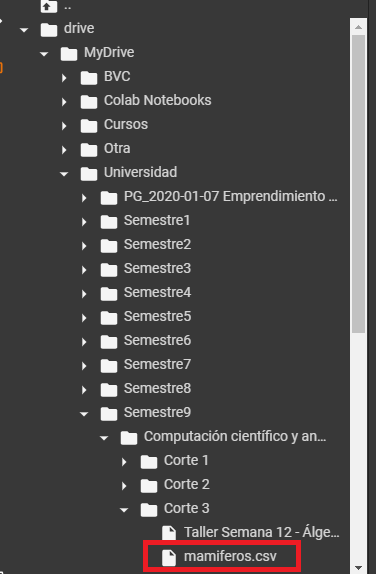

##### 2. Importe Numpy, Pandas, Matplotlib y SciPy de acuerdo con las convenciones explicadas.

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   

##### 3. Lea el archivo CSV, y asegúrese de asignar una de las columnas del archivo como índice de su dataframe.  Asegúrese de que los tipos de dato de sus columnas corresponden a la información que cada una representa.

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Universidad/Semestre9/Computación científico y analítica/Corte 3/mamiferos.csv")
data.head(20)

,Especie,Peso Cerebral,Peso Corporal,Gestacion,Camada
0,Aardvark,9.60,2.200,31,5.0
1,Acouchis,9.90,0.780,98,1.2
2,African elephant,4480.00,2800.000,655,1.0
3,Agoutis,20.30,2.800,104,1.3
4,Axis deer,219.00,89.000,218,1.0
5,Badger,53.00,6.000,60,2.2
6,Barbary sheep,210.00,66.000,158,1.2
7,Barking deer,124.00,16.000,183,1.1
8,Bat-eared fox,28.50,3.200,65,4.0
9,Beaked whale,500.00,250.000,240,1.8


##### 4. ¿Cuál es el peso cerebral promedio de los mamíferos que pesan más de 1 tonelada?



In [ ]:

corporal = data.loc[data['Peso Corporal'] > 1000] 
corporal


,Especie,Peso Cerebral,Peso Corporal,Gestacion,Camada
2,African elephant,4480.0,2800.0,655,1.0
47,Hippopotamus,590.0,1400.0,240,1.0


In [ ]:
print("Peso cerebral promedio: ",np.mean(corporal['Peso Cerebral']))


Peso cerebral promedio:  2535.0


##### 5. ¿Cuál es el mamífero que en promedio tiene camadas más grandes?

In [ ]:
mayor = np.max(data['Camada'])
maxima = data.loc[data['Camada'] >= mayor]
maxima


,Especie,Peso Cerebral,Peso Corporal,Gestacion,Camada
27,Domestic pig,180.00,190.00,115,8.0
74,Rat II,2.38,0.34,21,8.0


##### 6. ¿Cuál es la desviación estándar de los periodos de gestación promedio, para los mamíferos que pesan menos de 50kg?  ¿Cuál es su media?

In [ ]:

peso = data.loc[data['Peso Corporal'] < 50]
media = np.mean(peso['Gestacion'])
desviacion = np.std(peso["Gestacion"])
print("Desviación: ", desviacion)



Desviación:  67.70365665137253


##### 7. Muestree 1500 valores aleatorios de una distribución normal, utilizando los resultados del punto 6. como parámetros.


In [ ]:

aleatorios = np.random.normal(loc=media, scale=desviacion, size=1500)
print(aleatorios)
len(aleatorios)

[ 21.06831472  -1.63556786 108.46207261 ... 132.53969862 108.81179371
 105.87675372]


1500

##### 8. Grafique los 1500 valores generados en el punto 7., asegurándose de incluir líneas de guía para la media, y +/- tres desviaciones estándar. Asegúrese de que esta gráfica tenga títulos, etiquetas y nombres adecuados.  Asegúrese de guardarla en formato PNG, con una resolución no menor a 300dpi. Adjunte la imágen exportada a su entrega como sustento para este punto del taller.

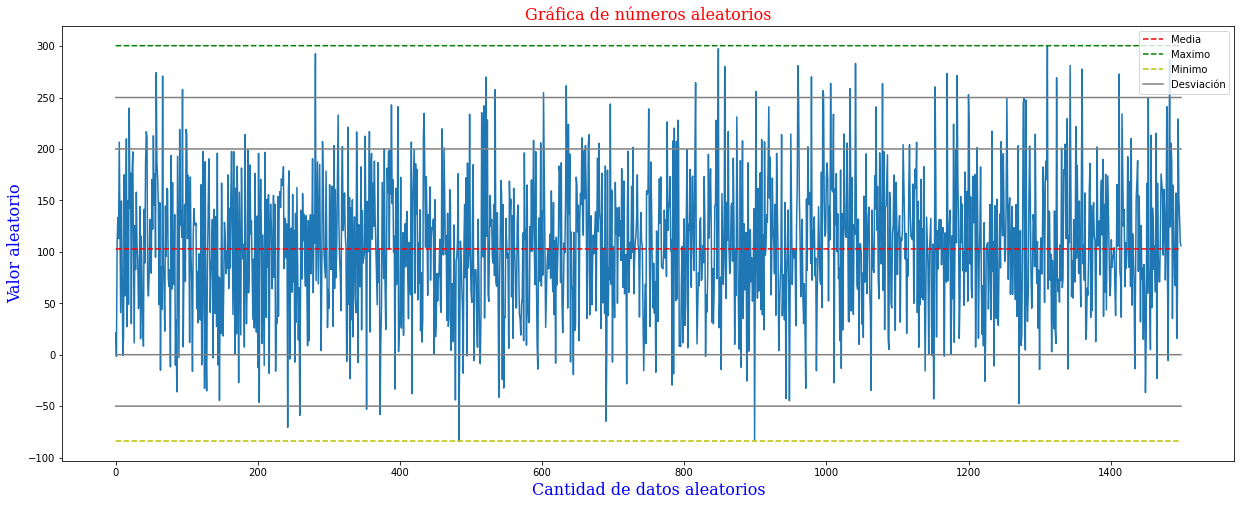

In [ ]:
plt.figure(figsize=(21,8))
plt.title("Gráfica de números aleatorios", family='serif', color='r', weight='normal', size = 16)
plt.xlabel("Cantidad de datos aleatorios", family='serif', color='b', weight='normal', size = 16)
plt.ylabel("Valor aleatorio", family='serif', color='b', weight='normal', size = 16)

plt.plot(np.arange(len(aleatorios)), aleatorios)
plt.plot(np.arange(len(aleatorios)), [media for x in aleatorios], 'r--', label='Media')
plt.plot(np.arange(len(aleatorios)), [np.max(aleatorios) for x in aleatorios], 'g--', label='Maximo')
plt.plot(np.arange(len(aleatorios)), [np.min(aleatorios) for x in aleatorios], 'y--', label='Minimo')
plt.plot(np.arange(len(aleatorios)), [200 for x in aleatorios], 'grey' , label='Desviación')
plt.plot(np.arange(len(aleatorios)), [0 for x in aleatorios], 'grey')
plt.plot(np.arange(len(aleatorios)), [-50 for x in aleatorios], 'grey')
plt.plot(np.arange(len(aleatorios)), [250 for x in aleatorios], 'grey')
plt.legend()
plt.savefig('Punto8.png', dpi=500, bbox_inches='tight')

##### 9. Grafique el histograma del tamaño de camada promedio para todas las especies. Por medio de fitting, estime los parámetros de la distribución; asuma una distribución normal. Genere la curva de distribución normal con los parámetros encontrados, utilizando la función de densidad de probabilidades, y muéstrela sobre el histograma previamente generado. ¿Cree usted que los datos presentan un comportamiento Normal? Discuta sus resultados. Asegúrese de que esta gráfica tenga títulos, etiquetas y nombres adecuados. Asegúrese de guardarla en formato JPG, en alta calidad. Adjunte la imágen exportada a su entrega como sustento para este punto del taller.

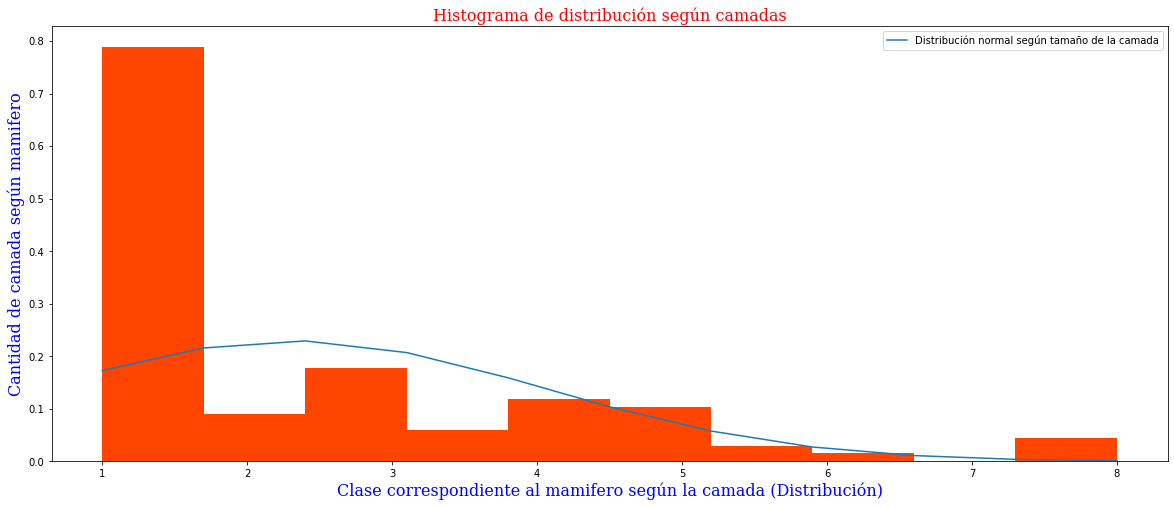

In [ ]:
from scipy.stats import norm

media = np.mean(data['Camada'])
desviacion = np.std(data['Camada'])

plt.figure(figsize=(20,8))
plt.title("Histograma de distribución según camadas", family='serif', color='r', weight='normal', size = 16)
plt.xlabel("Clase correspondiente al mamifero según la camada (Distribución)", family='serif', color='b', weight='normal', size = 16)
plt.ylabel("Cantidad de camada según mamifero", family='serif', color='b', weight='normal', size = 16)

_,histograma,_ = plt.hist(data['Camada'], density=True, lw=1, color="orangered")

mu, sigma = norm.fit(data['Camada'])
fitting  = norm.pdf(histograma, mu, sigma)
plt.plot(histograma, fitting, label="Distribución normal según tamaño de la camada")
plt.plot(label="Distribución normal de la camada")

plt.legend()
plt.savefig('Punto9.png', dpi=500, bbox_inches='tight')

**RTA 9**
##### La distribución normal sobre el histograma de la distribución de los mamiferos y la cantidad de camada a la que corresponde cada uno de los mamiferos clasificados. La gráica representada no se ve relacionada sobre la distribución normal debido a que tiene un comportamiento un poco creciente y posteriormente se acerca a un punto 0.0 según la distribución normal; es por esto que la distribución no corresponde a la relacionada

##### 10. Grafique el histograma del peso cerebral promedio para todas las especies. Consulte fuentes adicionales (como por ejemplo [esta](https://medium.com/@srowen/common-probability-distributions-347e6b945ce4)), al igual que la documentación de scipy, y determine cuál distribución se asemeja al comportamiento de los datos. Posteriormente, estime los parámetros de dicha distribución por medio de fitting, genere la curva de distribución normal con los parámetros encontrados utilizando la función de densidad de probabilidades, y muéstrela sobre el histograma previamente generado. Asegúrese de que esta gráfica tenga títulos, etiquetas y nombres adecuados. Asegúrese de guardarla en formato SVG, con una resolución no menor a 300dpi. Adjunte la imágen exportada a su entrega como sustento para este punto del taller.

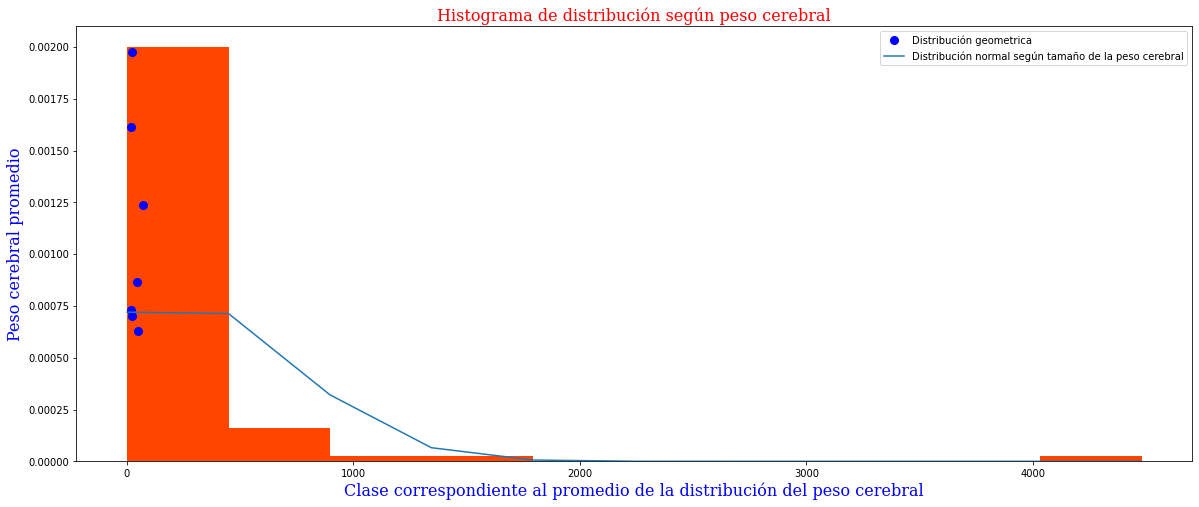

In [ ]:
from scipy.stats import norm, geom
from scipy.optimize import curve_fit

media = np.mean(data['Camada'])
desviacion = np.std(data['Camada'])

plt.figure(figsize=(20,8))
plt.title("Histograma de distribución según peso cerebral", family='serif', color='r', weight='normal', size = 16)
plt.xlabel("Clase correspondiente al promedio de la distribución del peso cerebral", family='serif', color='b', weight='normal', size = 16)
plt.ylabel("Peso cerebral promedio", family='serif', color='b', weight='normal', size = 16)

_,histograma,_ = plt.hist(data['Peso Cerebral'], density=True, lw=1, color="orangered")

mu, sigma = norm.fit(data['Peso Cerebral'])
fitting  = norm.pdf(histograma, mu, sigma)

p = data['Peso Cerebral']
x = geom.ppf(0.999, p)
y = geom.ppf(0.10, p)

plt.plot(geom.pmf(x,p), 'bo', ms=8, label='Distribución geometrica')

plt.vlines(1000, 0, geom.pmf(x, p), colors='b', lw=5, alpha=0.5)

plt.plot(histograma, fitting, label="Distribución normal según tamaño de la peso cerebral")
plt.plot(label="Distribución normal del Peso Cerebral")

plt.legend()

plt.savefig('Punto10.svg', dpi=500, bbox_inches='tight')

##### 11. Calcule la correlación (tanto de Spearman, como de Pearson) entre todas las variables. Preséntelas en una tabla, y discútalas brevemente.

In [ ]:
pearson = data.corr(method='pearson')
spearman = data.corr(method='spearman')


In [ ]:
print("Tabla de datos según la correlación de Pearson \n")
pearson


Tabla de datos según la correlación de Pearson 



,Peso Cerebral,Peso Corporal,Gestacion,Camada
Peso Cerebral,1.000000,0.864027,0.728191,-0.254561
Peso Corporal,0.864027,1.000000,0.624674,-0.182737
Gestacion,0.728191,0.624674,1.000000,-0.603752
Camada,-0.254561,-0.182737,-0.603752,1.000000


In [ ]:
print("Tabla de datos según la correlación de Spearman \n")
spearman

Tabla de datos según la correlación de Spearman 



,Peso Cerebral,Peso Corporal,Gestacion,Camada
Peso Cerebral,1.000000,0.955652,0.878250,-0.665454
Peso Corporal,0.955652,1.000000,0.814465,-0.554316
Gestacion,0.878250,0.814465,1.000000,-0.780468
Camada,-0.665454,-0.554316,-0.780468,1.000000


##### 12. Presente un correlograma de dichas correlaciones (con el método de su escogencia), y discuta sus resultados. Asegúrese de utilizar un mapa de colores distinto a la escala de gris

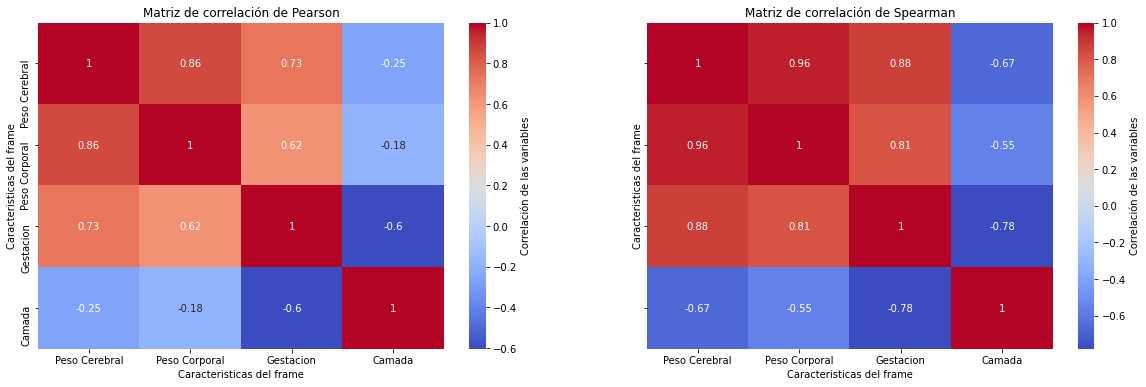

In [ ]:
import seaborn as sns

fig, axes = plt.subplots(1,2, figsize=(20, 6), sharey=True)

sns.heatmap(pearson,ax=axes[0], annot = True,cmap="coolwarm",  cbar_kws={'label': 'Correlación de las variables'})
axes[0].title.set_text("Matriz de correlación de Pearson")
axes[0].set_xlabel("Caracteristicas del frame")
axes[0].set_ylabel("Caracteristicas del frame")

sns.heatmap(spearman,ax=axes[1], annot = True,cmap="coolwarm",  cbar_kws={'label': 'Correlación de las variables'})
axes[1].title.set_text("Matriz de correlación de Spearman")
axes[1].set_xlabel(xlabel="Caracteristicas del frame")
axes[1].set_ylabel(ylabel="Caracteristicas del frame")

plt.show()

**RTA 12**
##### Como se olbserva en ambos mapas de calor, se observa que la variable con mayor relación a partir de las otra variables es *Peso Corporal*, mientras que el valor menos relacionado es de la *Gestación*, estos dos mapas corresponden a un mismo resultado de correlación, sin embargo, presenta valores diferentes con respecto a los métodos de Pearson y Spearman

##### 13. Explore las variables fuertemente correlacionadas (tanto positiva, como negativamente), mediante diagramas de dispersión. ¿Que tipo de comportamientos puede notar entre estas variables? Discuta sus observaciones. Asegúrese de que estas gráficas tenga títulos, etiquetas y nombres adecuados.

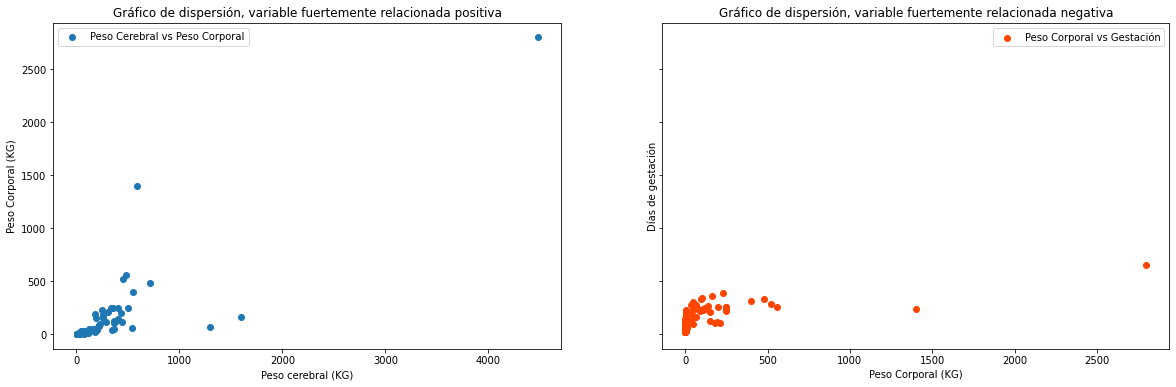

In [ ]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(20, 6), sharey=True)

ax0.scatter(data['Peso Cerebral'], data['Peso Corporal'], label="Peso Cerebral vs Peso Corporal")
ax0.title.set_text("Gráfico de dispersión, variable fuertemente relacionada positiva")
ax0.set_xlabel("Peso cerebral (KG)")
ax0.set_ylabel("Peso Corporal (KG)")
ax0.legend()

ax1.scatter(data['Peso Corporal'], data['Gestacion'], label="Peso Corporal vs Gestación", color='orangered')
ax1.title.set_text("Gráfico de dispersión, variable fuertemente relacionada negativa")
ax1.set_xlabel(xlabel="Peso Corporal (KG)")
ax1.set_ylabel(ylabel="Días de gestación")
ax1.legend()
plt.show()


**RTA 13 **
El comportamiento de la dispersión se evidencia que los datos se encuentran relaciondos fuertemente, se mantienen sobre un grupo cercano según los datos registrados y la relación entre las variables, mientras que en la que esta fuertemente relacionada negativamente se mantiene en valores casi que constante sobre el eje Y

##### 14. Explore las variables débilmente correlacionadas (tanto positiva, como negativamente), mediante diagramas de dispersión. ¿Que tipo de comportamientos puede notar entre estas variables? Discuta sus observaciones. Asegúrese de que estas gráficas tenga títulos, etiquetas y nombres adecuados.

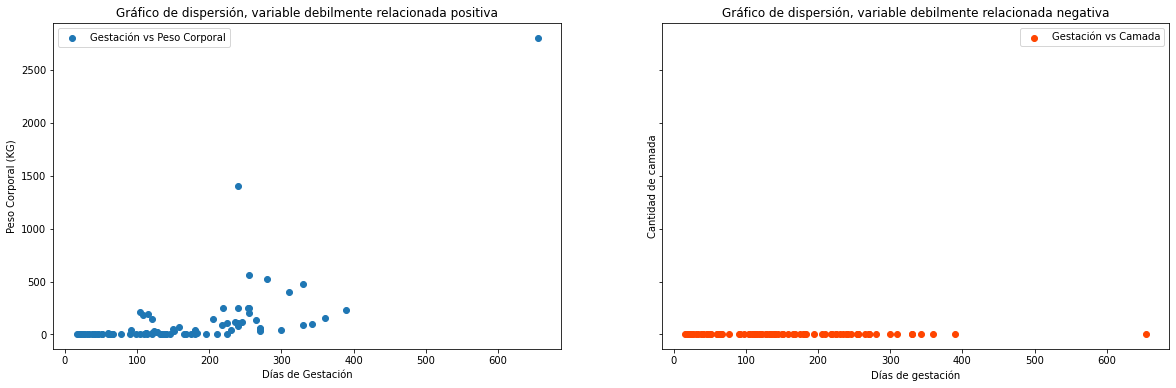

In [ ]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(20, 6), sharey=True)

ax0.scatter(data['Gestacion'], data['Peso Corporal'], label="Gestación vs Peso Corporal")
ax0.title.set_text("Gráfico de dispersión, variable debilmente relacionada positiva")
ax0.set_xlabel("Días de Gestación")
ax0.set_ylabel("Peso Corporal (KG)")
ax0.legend()

ax1.scatter(data['Gestacion'], data['Camada'], label="Gestación vs Camada", color='orangered')
ax1.title.set_text("Gráfico de dispersión, variable debilmente relacionada negativa")
ax1.set_xlabel(xlabel="Días de gestación")
ax1.set_ylabel(ylabel="Cantidad de camada")
ax1.legend()
plt.show()


**RTA 14**

EL comportamiento que se registra con las variables debilmente relacionada, se evidencia que tiene un comportamiento no tan agrupado de los datos en relacion a las variables que se registran como debilmente correlacionaas

##### 15. Defina las siguientes matrices como objetos de tipo matriz de NumPy

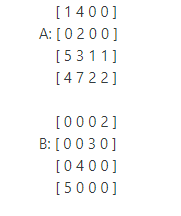

---





In [ ]:
A = np.array([[1,4,0,0],[0,2,0,0],[5,3,1,1],[4,7,2,2]])
A

array([[1, 4, 0, 0],
       [0, 2, 0, 0],
       [5, 3, 1, 1],
       [4, 7, 2, 2]])

In [ ]:
B = np.array([[0,0,0,2],[0,0,3,0],[0,4,0,0],[5,0,0,0]])
B

array([[0, 0, 0, 2],
       [0, 0, 3, 0],
       [0, 4, 0, 0],
       [5, 0, 0, 0]])

##### 16. Encuentre la matriz inversa de B, y compruebe que el resultado es correcto por medio del producto punto.

In [ ]:
inversa = np.linalg.inv(B)
inversa

array([[0.        , 0.        , 0.        , 0.2       ],
       [0.        , 0.        , 0.25      , 0.        ],
       [0.        , 0.33333333, 0.        , 0.        ],
       [0.5       , 0.        , 0.        , 0.        ]])

In [ ]:
np.dot(inversa,B)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

##### 17. Resuelva el siguiente sistema de ecuaciones lineales utilizando np.linalg.solve():

$$\ x + y + z = 6 $$
$$2y + 5z = -4 $$
$$2x + 5y - z = 27 $$

In [ ]:
entradas = np.array([[1,1,1],[0,2,5],[2,5,-1]])
respuestas = np.array([6,-4,27])
np.linalg.solve(entradas, respuestas)

array([ 5.,  3., -2.])

##### 18. Encuentre los valores y vectores propios de la matriz A

In [ ]:
valores = np.linalg.eigvals(A)
valores

array([0., 3., 1., 2.])

In [ ]:
vectores = np.linalg.eig(A) 
vectores

(array([0., 3., 1., 2.]),
 array([[ 0.        ,  0.        ,  0.19518001,  0.10929207],
        [ 0.        ,  0.        ,  0.        ,  0.02732302],
        [-0.70710678, -0.4472136 ,  0.09759001, -0.31421469],
        [ 0.70710678, -0.89442719, -0.97590007, -0.94264406]]))